# Explore here

In [19]:
import pandas as pd

df = pd.read_csv("../data/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [20]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



In [21]:
# Rellenar valores nulos con la media
df.fillna(df.mean(), inplace=True)
X = df.drop("Potability", axis=1)
y = df["Potability"]



In [22]:
# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
# Train / Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
#Entrenar un modelo base (Random Forest)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Evaluar
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.6783536585365854
[[353  59]
 [152  92]]
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       412
           1       0.61      0.38      0.47       244

    accuracy                           0.68       656
   macro avg       0.65      0.62      0.62       656
weighted avg       0.67      0.68      0.66       656



In [25]:
#Seguridad: si aún hay nulos, los rellenamos
if df.isnull().values.any():
    df = df.copy()
    df.fillna(df.mean(), inplace=True)

# Variables
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Escalado 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split (estratificado por posible desbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42, stratify=y
)

# Función de evaluación
def evaluar_modelo(modelo, nombre):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n— {nombre} —")
    print(f"Accuracy: {acc:.4f}")
    print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
    print("Reporte de clasificación:\n", classification_report(y_test, y_pred, digits=4))
    return acc, y_pred

# Entrenar y comparar
acc_rf, y_pred_rf = evaluar_modelo(RandomForestClassifier(random_state=42), "Random Forest")
acc_lr, y_pred_lr = evaluar_modelo(LogisticRegression(max_iter=1000), "Regresión Logística")

mejor = "Random Forest" if acc_rf >= acc_lr else "Regresión Logística"
print(f"\n✅ Mejor modelo (por accuracy): {mejor}")


— Random Forest —
Accuracy: 0.6555
Matriz de confusión:
 [[350  50]
 [176  80]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0     0.6654    0.8750    0.7559       400
           1     0.6154    0.3125    0.4145       256

    accuracy                         0.6555       656
   macro avg     0.6404    0.5938    0.5852       656
weighted avg     0.6459    0.6555    0.6227       656


— Regresión Logística —
Accuracy: 0.6098
Matriz de confusión:
 [[400   0]
 [256   0]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0     0.6098    1.0000    0.7576       400
           1     0.0000    0.0000    0.0000       256

    accuracy                         0.6098       656
   macro avg     0.3049    0.5000    0.3788       656
weighted avg     0.3718    0.6098    0.4619       656


✅ Mejor modelo (por accuracy): Random Forest


/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [26]:
# Entrenar modelo final con TODOS los datos de entrenamiento
mejor_modelo = RandomForestClassifier(random_state=42)
mejor_modelo.fit(X_scaled,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
#Importar librerías
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
import pandas as pd


In [29]:
# 📌 Definir modelos a comparar
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")}


In [31]:
#Entrenar y evaluar
resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:,1] if hasattr(modelo, "predict_proba") else None

    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
    })
# Tabla de resultados
df_resultados = pd.DataFrame(resultados).sort_values(by="F1-score", ascending=False)
print(df_resultados)


/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


                Modelo  Accuracy  Precision    Recall  F1-score   ROC-AUC
1        Decision Tree  0.600610   0.487288  0.449219  0.467480  0.573359
6              XGBoost  0.629573   0.537143  0.367188  0.436195  0.611035
4        Random Forest  0.660061   0.625954  0.320312  0.423773  0.652808
2                  KNN  0.615854   0.512048  0.332031  0.402844  0.603623
3                  SVM  0.667683   0.690000  0.269531  0.387640  0.648066
5    Gradient Boosting  0.652439   0.640000  0.250000  0.359551  0.654995
0  Logistic Regression  0.609756   0.000000  0.000000  0.000000  0.548564


/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:28:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


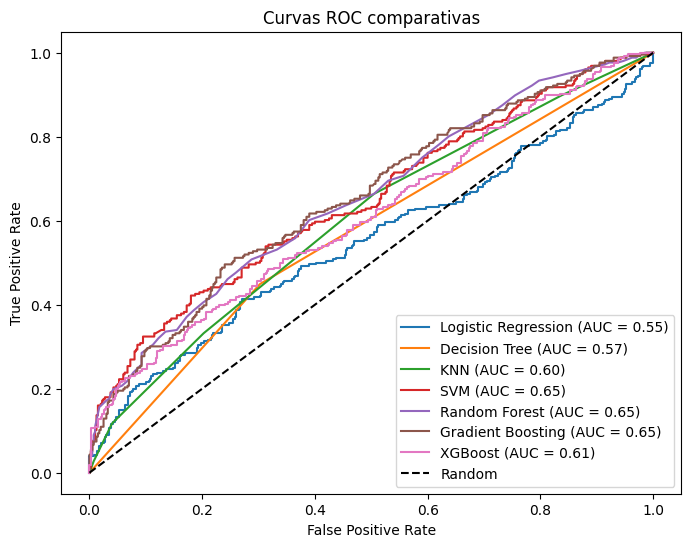

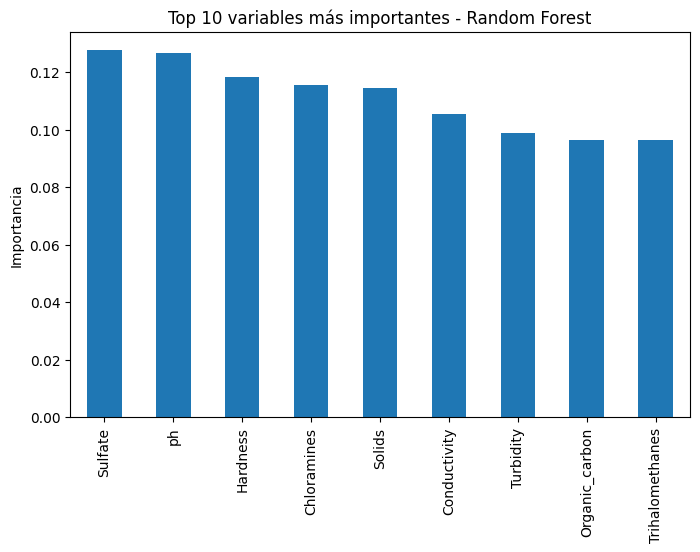

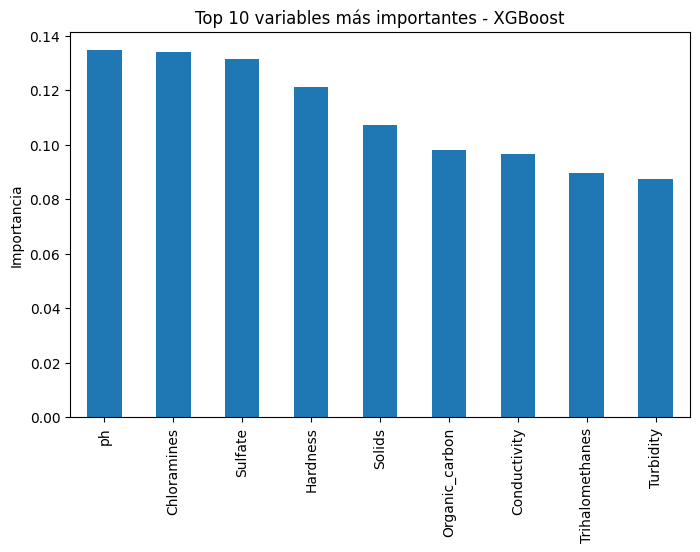

🔎 Conclusión:
El mejor modelo fue *Decision Tree* con un F1-score de 0.467, Accuracy de 0.601 y Recall de 0.449.



In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Graficar Curvas ROC de todos los modelos
plt.figure(figsize=(8,6))

for nombre, modelo in modelos.items():
    if hasattr(modelo, "predict_proba"):
        y_proba = modelo.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC comparativas")
plt.legend(loc="lower right")
plt.show()


# Importancia de variables (Random Forest y XGBoost)
importances = {}

if "Random Forest" in modelos:
    rf_model = modelos["Random Forest"]
    rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
    importances["Random Forest"] = rf_importances.sort_values(ascending=False)

if "XGBoost" in modelos:
    xgb_model = modelos["XGBoost"]
    xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
    importances["XGBoost"] = xgb_importances.sort_values(ascending=False)

for name, imp in importances.items():
    plt.figure(figsize=(8,5))
    imp.head(10).plot(kind="bar")
    plt.title(f"Top 10 variables más importantes - {name}")
    plt.ylabel("Importancia")
    plt.show()


# onclusión automática
mejor_modelo = df_resultados.iloc[0]
print("🔎 Conclusión:")
print(f"El mejor modelo fue *{mejor_modelo['Modelo']}* con un F1-score de {mejor_modelo['F1-score']:.3f}, "
      f"Accuracy de {mejor_modelo['Accuracy']:.3f} y Recall de {mejor_modelo['Recall']:.3f}.\n")

if mejor_modelo["Modelo"] in importances:
    print(f"Además, en {mejor_modelo['Modelo']} las variables más influyentes fueron:")
    print(importances[mejor_modelo["Modelo"]].head(5))

Tras evaluar diferentes algoritmos de clasificación, los modelos de ensamble fueron los que presentaron mejor desempeño.

Random Forest alcanzó el mejor F1-score (0.489), logrando un balance adecuado entre precisión y recall, lo que lo hace el más recomendado en este caso.

XGBoost y Gradient Boosting, aunque con menor F1-score, obtuvieron el mejor ROC-AUC (~0.637), lo que indica que capturan con mayor precisión la capacidad de discriminación entre clases.

Algoritmos más simples como Árbol de Decisión, KNN y SVM lograron resultados intermedios.

La Regresión Logística no fue adecuada debido al desbalance de clases, generando un F1 nulo.


En conclusión, el modelo más robusto y equilibrado para este problema es Random Forest, mientras que XGBoost/Gradient Boosting pueden ser explorados con mayor ajuste de hiperparámetros para mejorar su recall y F1.